In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
path = r"C:\Users\USER\Desktop\real_estate_raw\Real_Estate_Sales_2001-2020_GL.csv"
raw_data = pd.read_csv(path,low_memory=False)

In [3]:
#create a copy of the database to work with and to keep the original
data = raw_data.copy()

In [4]:
#replace all spaces in column names with underscore 
new_columns = []
for column in raw_data.columns:
    column = column.replace(' ','_')
    new_columns.append(column)
data.columns = new_columns    
data.columns = new_columns    

In [5]:
#creating a better serial numbering
data['Serial_Number'] = list(range(0,len(data)))
data['Serial_Number'] = data['Serial_Number'].astype(str)
def zero_fill(number):
    return number.zfill(len('997212'))
data['Serial_Number'] = data['Serial_Number'].apply(zero_fill)

In [34]:
data.dropna(subset = ['Date_Recorded','Sale_Amount','Residential_Type','Property_Type','Town'],inplace=True,how = 'any')

In [35]:
data

,Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type,Non_Use_Code,Assessor_Remarks,OPM_remarks,Location,sales_bins,Recorded_Year,Recorded_Month
1,000001,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN,400000-499999,2020,10
2,000002,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN,100000-199999,2021,3
3,000003,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN,800000-899999,2021,4
4,000004,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN,1400000-1499999,2021,7
5,000005,2020,2020-12-09,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.678000,Residential,Single Family,NaN,NaN,NaN,NaN,1200000-1299999,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997207,997207,2019,2020-08-03,Wilton,145 WHIPSTICK RD,681870.0,1134708.0,0.600900,Single Family,Single Family,25 - Other,NaN,"PER MLS CLOSING PRICE = $1,145,000",NaN,1100000-1199999,2020,8
997208,997208,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN,0-99999,2020,6
997209,997209,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN,0-99999,2019,11
997210,997210,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN,200000-299999,2020,4


In [7]:
bin_width = 100000
max_value = data['Sale_Amount'].max()  #maximum value in your data

#number of bins based on the bin width
num_bins = int(max_value / bin_width) + 1

#bin edges and labels dynamically
bins = [i * bin_width for i in range(num_bins)]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(num_bins-1)] + [f"{bins[-1]}+"]

data['sales_bins'] = pd.cut(data['Sale_Amount'], bins=bins + [float('inf')], labels=labels)

In [8]:
data['Date_Recorded'] = pd.to_datetime(data['Date_Recorded'])

data['Recorded_Year'] = data['Date_Recorded'].dt.year.astype(int)
data['Recorded_Month'] = data['Date_Recorded'].dt.month.astype(int)


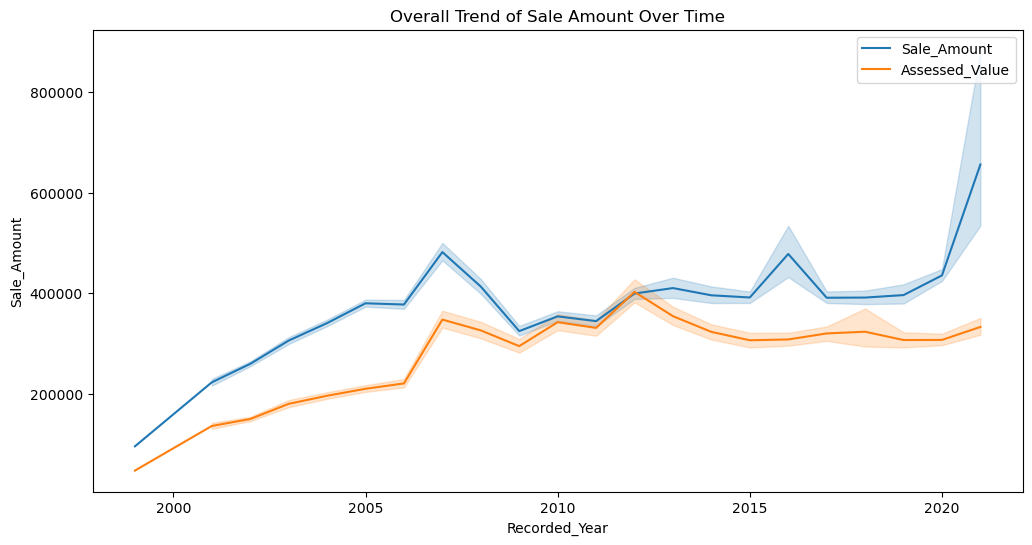

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Recorded_Year', y='Sale_Amount',label = "Sale_Amount")
sns.lineplot(data=data, x='Recorded_Year', y='Assessed_Value',label = "Assessed_Value")
plt.legend()
plt.title('Overall Trend of Sale Amount Over Time')

plt.show()

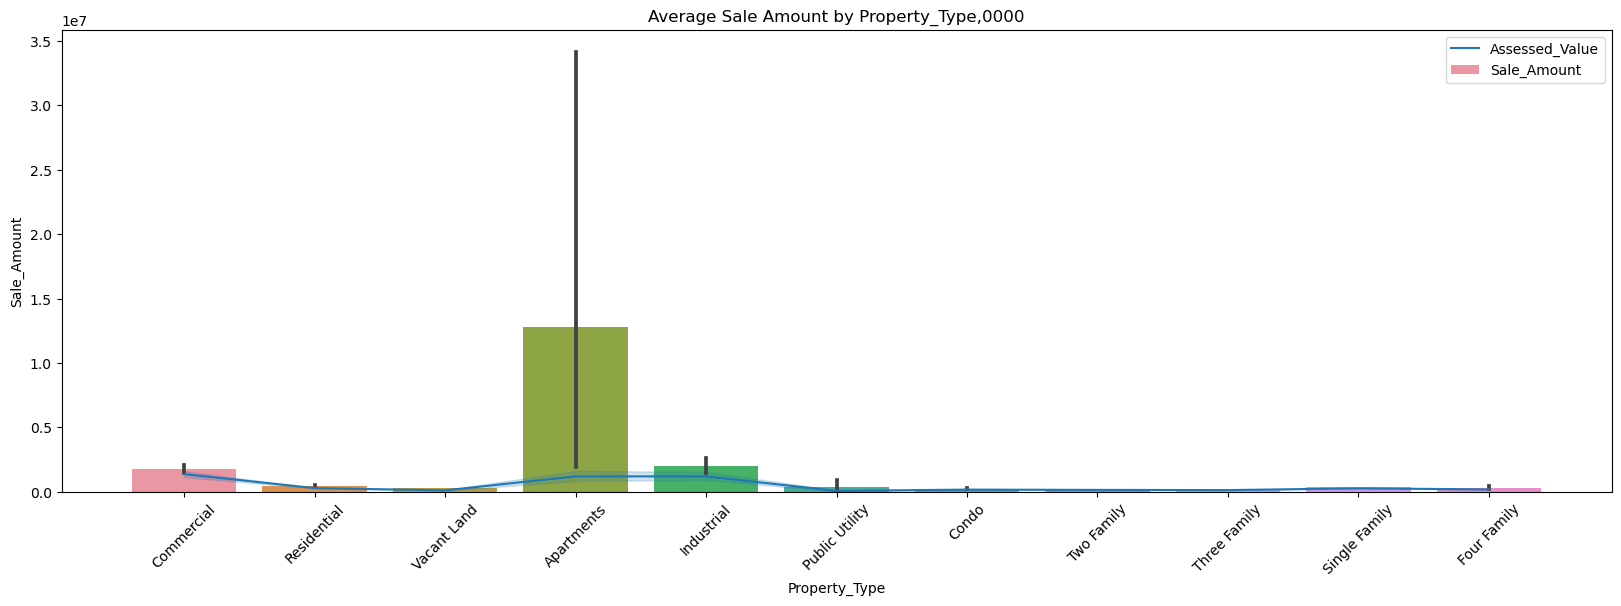

In [10]:
plt.figure(figsize=(20, 6))

sns.barplot(x='Property_Type', y='Sale_Amount', data=data, estimator=np.mean,label = 'Sale_Amount' )
sns.lineplot(x='Property_Type', y='Assessed_Value', data=data, estimator=np.mean,label = 'Assessed_Value')
plt.xticks(rotation=45)
plt.title('Average Sale Amount by Property_Type,0000')
plt.show()

In [47]:
data

,Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type,Non_Use_Code,Assessor_Remarks,OPM_remarks,Location,sales_bins,Recorded_Year,Recorded_Month
1,000001,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN,400000-499999,2020,10
2,000002,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN,100000-199999,2021,3
3,000003,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN,800000-899999,2021,4
4,000004,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN,1400000-1499999,2021,7
5,000005,2020,2020-12-09,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.678000,Residential,Single Family,NaN,NaN,NaN,NaN,1200000-1299999,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997207,997207,2019,2020-08-03,Wilton,145 WHIPSTICK RD,681870.0,1134708.0,0.600900,Single Family,Single Family,25 - Other,NaN,"PER MLS CLOSING PRICE = $1,145,000",NaN,1100000-1199999,2020,8
997208,997208,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN,0-99999,2020,6
997209,997209,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN,0-99999,2019,11
997210,997210,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN,200000-299999,2020,4


In [54]:
# Assuming 'Town' and 'Property_Type' are categorical features
categorical_features = ['Town', 'Property_Type']

# Features and Target variable
X = data.drop(['Sale_Amount','Location','OPM_remarks','Assessor_Remarks','Non_Use_Code'], axis=1)  # all columns except Sale_Amount
y = data['Sale_Amount']  # Sale_Amount is the target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Bundle preprocessing and modeling code in a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Training the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Town', 'Property_Type'])])),
                ('regressor', LinearRegression())])

In [56]:
# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 385451895564.3531
R^2 Score: 0.242975346390381


In [57]:
y_test[0:10]

410069    355000.0
857589    587000.0
479247     48038.0
6246      341000.0
802362    169000.0
476879    214900.0
970201    285000.0
574502    230000.0
828817    110000.0
718745    123000.0
Name: Sale_Amount, dtype: float64

In [58]:
y_pred[0:10]

array([331245.35752609, 334689.25380016, 189088.86707604, 241071.86198611,
       160259.65436438, 241105.13719812, 421278.33974518, 220546.20407725,
       227111.09483633, 235993.8010121 ])

In [59]:
X

,Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value,Sales_Ratio,Property_Type,Residential_Type,sales_bins,Recorded_Year,Recorded_Month
1,000001,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,0.588300,Residential,Single Family,400000-499999,2020,10
2,000002,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,0.724800,Residential,Condo,100000-199999,2021,3
3,000003,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,0.695800,Residential,Single Family,800000-899999,2021,4
4,000004,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330.0,0.595700,Residential,Single Family,1400000-1499999,2021,7
5,000005,2020,2020-12-09,Avon,57 FAR HILLS DRIVE,847520.0,0.678000,Residential,Single Family,1200000-1299999,2020,12
...,...,...,...,...,...,...,...,...,...,...,...,...
997207,997207,2019,2020-08-03,Wilton,145 WHIPSTICK RD,681870.0,0.600900,Single Family,Single Family,1100000-1199999,2020,8
997208,997208,2019,2020-06-24,New London,4 BISHOP CT,60410.0,1.137665,Single Family,Single Family,0-99999,2020,6
997209,997209,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,0.898400,Single Family,Single Family,0-99999,2019,11
997210,997210,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,0.578300,Single Family,Single Family,200000-299999,2020,4
